<a href="https://colab.research.google.com/github/Taryn-Cail/Python-Group-Project-2704/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Testing: students with lower gpa have higher mental stress levels
#Variables: GPA (independnt), Mental Stress Level (dependent)

#Calc average stress levels for those with different GPA

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the data set with only the required columns
df = pd.read_csv('data.csv')
df = df[['Student_ID', 'Study_Hours_Per_Day', 'GPA']]
print(df)

      Student_ID  Study_Hours_Per_Day   GPA
0              1                  6.9  2.99
1              2                  5.3  2.75
2              3                  5.1  2.67
3              4                  6.5  2.88
4              5                  8.1  3.51
...          ...                  ...   ...
1995        1996                  6.5  3.32
1996        1997                  6.3  2.65
1997        1998                  6.2  3.14
1998        1999                  8.1  3.04
1999        2000                  9.0  3.58

[2000 rows x 3 columns]


In [9]:
#Grouping GPA into levels
def categorize_gpa(gpa):
  #0-2 low
  #2-3 med
  #3-4 high
  if gpa <= 2.5:
    return 'Low'
  elif gpa >2.5 and gpa <= 3:
    return 'Med'
  elif gpa > 3:
    return 'High'

#Create new col for GPA groups
df['GPA Level'] = df['GPA'].apply(categorize_gpa)
print(df)
print(type(df)) #Data frame
print(type(df['GPA Level'])) #Each col is a Series



      Student_ID  Study_Hours_Per_Day   GPA GPA Level
0              1                  6.9  2.99       Med
1              2                  5.3  2.75       Med
2              3                  5.1  2.67       Med
3              4                  6.5  2.88       Med
4              5                  8.1  3.51      High
...          ...                  ...   ...       ...
1995        1996                  6.5  3.32      High
1996        1997                  6.3  2.65       Med
1997        1998                  6.2  3.14      High
1998        1999                  8.1  3.04      High
1999        2000                  9.0  3.58      High

[2000 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
#Calculate mean stress for GPA groups
#groupby() groups by col
#[]"Mental Stress Level"].mean() calculates mean stress level for each group
#resetindex() converts back into data
gpa_by_studyH = df.groupby('GPA Level')['Study_Hours_Per_Day'].mean().reset_index()
print(stress_by_gpa)


  GPA Level  Study_Hours_Per_Day
0      High             8.154581
1       Low             5.727027
2       Med             6.335725


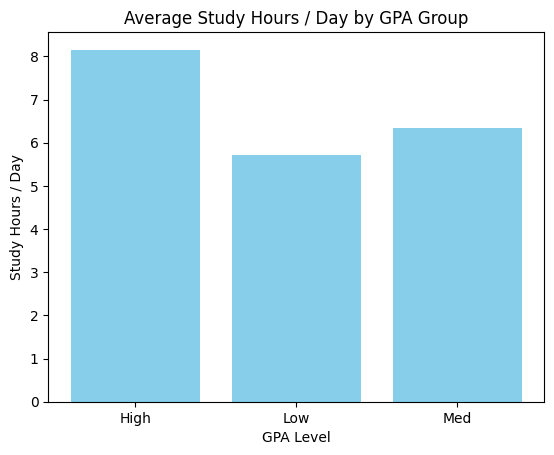

In [12]:
#Visualize - bar graph
plt.clf()
plt.bar(gpa_by_studyH['GPA Level'], gpa_by_studyH['Study_Hours_Per_Day'], color='skyblue')
plt.xlabel("GPA Level")
plt.ylabel("Study Hours / Day")
plt.title("Average Study Hours / Day by GPA Group")
plt.show()

[]

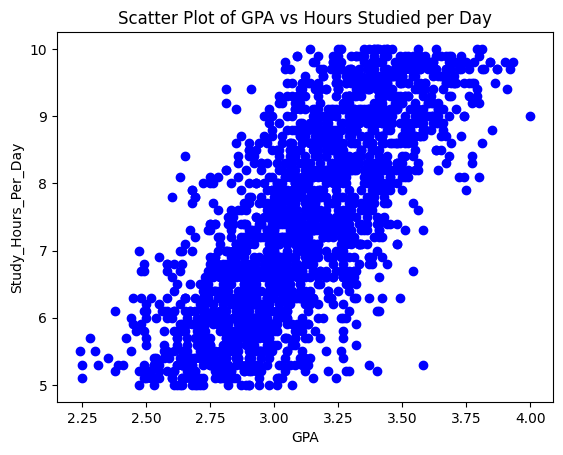

In [13]:
#Visualize - scatter plot

plt.clf()
plt.scatter(df['GPA'], df['Study_Hours_Per_Day'], color='blue', marker='o')
plt.xlabel('GPA')
plt.ylabel('Study_Hours_Per_Day')
plt.title('Scatter Plot of GPA vs Hours Studied per Day')
plt.plot()

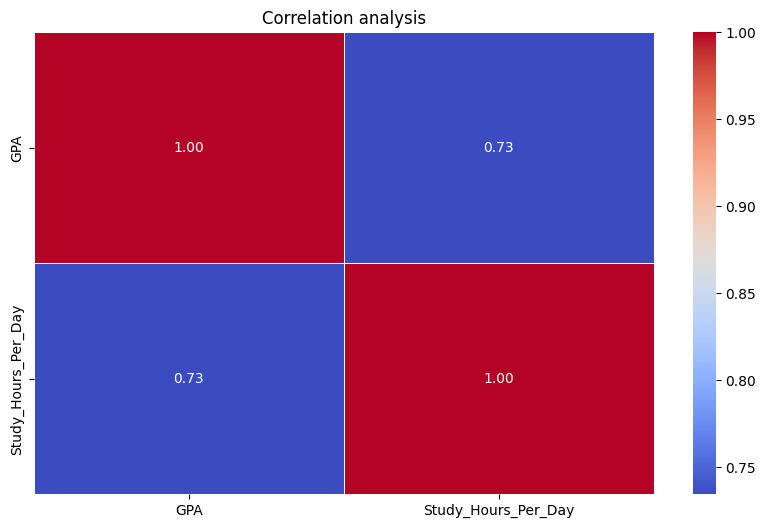

In [18]:
correltaion_data = df[['GPA','Study_Hours_Per_Day']]
corr_matrix = correltaion_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation analysis")
plt.show()